In [121]:
# External Modules
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd

# Internal Modules
import explanatory_images as img_gen

# Aspect Ratio

This notebook covers one of the most overlooked, yet critical, aspects of creating charts, **aspect ratio.**

First, we'll set the ground by setting definitions, clarifying misconceptions, and showing how to set the aspect ratio with `matplotlib`.

Then, recommendations are given for the correct use of aspect ratios for two different types of graphs: 
- Graph with shared units (i.e., where X and Y have the same units).
- Graph with distinct units (ex. time series where X is time and Y may be temperature or a dollar amount)


- [1.0 Aspect Ratio Fundamentals](#1.0-Aspect-Ratio-Fundamentals)
 - [1.1 Same Square. Different Looks.](#1.1-Same-Square.-Different-Looks.)
 - [1.2 With Shared Units, it is not about the axis ranges or length.](#1.2-With-Shared-Units,-it-is-not-about-the-axis-ranges-or-length.)
 - [1.3 Aspect Ratio affects Visual Perception](#1.3-Aspect-Ratio-affects-Visual-Perception)
 - [1.4 Be Careful with Default Aspect Ratios](#1.4-Be-Careful-with-Default-Aspect-Ratios)

## 1.0 Aspect Ratio Fundamentals

- The aspect ratio of a data graph is generally defined as the width-to-height ($w$ / $h$) ratio of the graph’s size. 

- **However, when graphs share the same units** (ex., both axes are in degrees or dollars), I think a more precise definition is (see 1.2):

$$\dfrac{\text{Size of 1 unit in y-data coordinates}}{\text{Size of 1 unit in x-data coordinates}}$$


### 1.1 Same Square. Different Looks.

From the [matplotlib docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_aspect.html)

- aspect=1 a square in data coordinates will be a true square.
- aspect=2 a square in data coordinates will be rendered with a height of twice its width.
- aspect=0.5 a square in data coordinates will be rendered with a height of half its width.

The function to set the aspect ratio is `Axes.set_aspect`.

We are specifying the exact same square patch for the three different aspect ratios. 

`
from matplotlib.patches import Rectangle
square = Rectangle(xy=(4, 4), width=2, height=2)      # Square with lower left corner at (4,4) and length of 2.
`

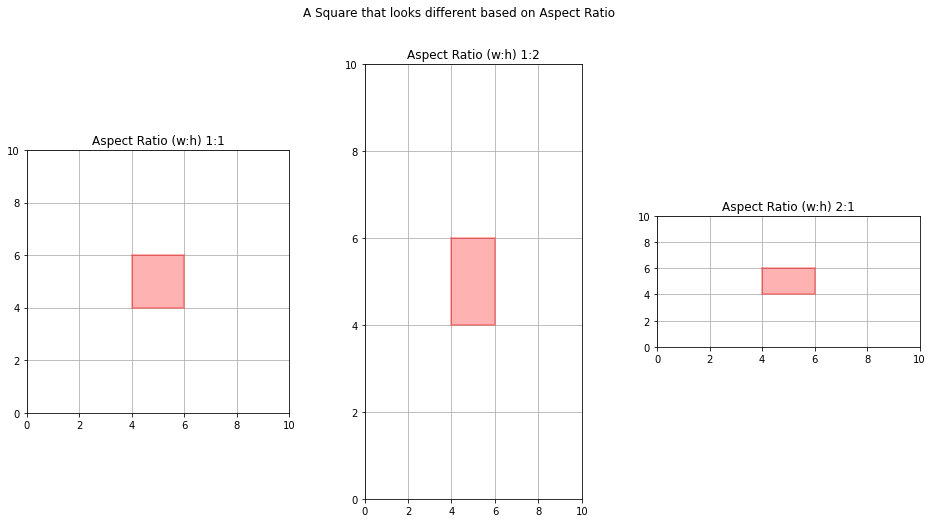

In [2]:
fig = img_gen.plot_squares(figsize = (16,8))
plt.show()

### 1.2 With Shared Units, it is not about the axis ranges or length.

A common misconception is when people focus strictly on the length or the range of the axes. However, **A graph can have an aspect ratio of 1 while having different ranges for X and Y and/or having one axis longer/shorter than the other.** See chart on the left.

Instead, we should focus on the size of 1 unit on both axes:

     If you were to measure 1" in y, is that the same amount as 1" in the x direction?

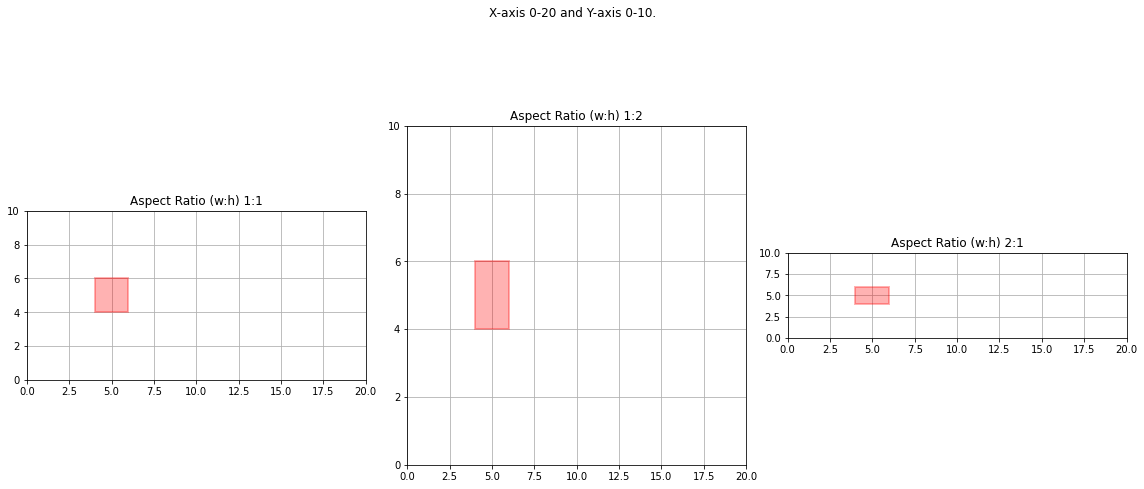

In [3]:
fig = img_gen.plot_squares_longer_xaxis(figsize = (16,8))
plt.show()

### 1.3 Aspect Ratio affects Visual Perception

The choice of aspect ratio determines the perception of steepness in slope. Let's look at three scenarios below:
- 1:1 Square aspect ratio. This is the correct aspect ratio since both axes are measured in the same units.
- 1:2 Tall aspect ratio. Suggests a much steeper slope.
- 2:1 Wide aspect ratio. Suggests a less steeper slope.

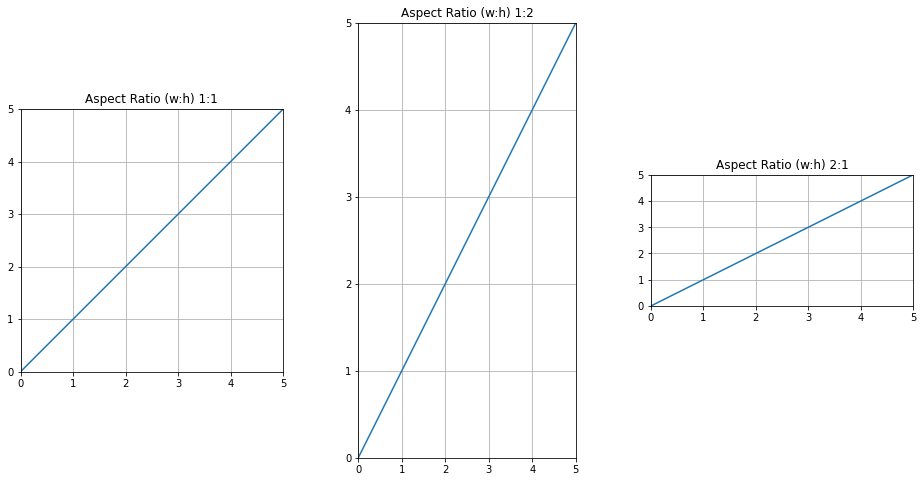

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,8))
x = [0, 1, 3, 4, 5]
y = x
for plot, asp_ratio, asp_ratio_str in zip(ax, ['equal', 2, 0.5], ['1:1', '1:2', '2:1']):
    plot.grid()
    plot.set_xlim(0,5)
    plot.set_ylim(0,5)
    plot.plot(x,y)
    plot.set_aspect(asp_ratio)
    plot.set_title('Aspect Ratio (w:h) ' + asp_ratio_str)
plt.show()

### 1.4 Be Careful with Default Aspect Ratios

Before writing this notebook, I haven't ever paid too much attention to the default aspect ratio after we execute `ax.plot`. However, I do now!

We'll now look at an example looking at average temperatures for Austin, Texas (my hometown) and San Diego (my office location).

In [168]:
df = pd.read_csv('temperature.csv')
df.head()

,Month,Austin,San Diego,Detroit
0,Jan,48,57,25
1,Feb,54,58,27
2,Mar,62,60,37
3,Apr,70,62,48
4,May,76,64,60


In [ ]:
# Extract Data
temp_aus = df['Austin'].values
temp_sd = df['San Diego'].values
temp_dtw = df['Detroit'].values

# Appending initial value so we get a closed polygon
temp_aus = np.append(temp_aus, temp_aus[0])
temp_sd = np.append(temp_sd, temp_sd[0])
temp_dtw = np.append(temp_dtw, temp_dtw[0])

In [173]:
def plot_temps(ax, xArr, yArr, aspect_ratio, x_label, y_label, title):

    ax.plot(xArr, yArr)
    # Adding Text
    for i, txt in zip([0, 3, 6, 9], ['Jan 1st', 'Apr 1st', 'Jul 1st', 'Oct 1st']):
        ax.text(xArr[i], yArr[i] + 1 , txt, verticalalignment='bottom', horizontalalignment='center')
        ax.scatter(xArr[i], yArr[i], s = 15, marker = 'o', c = 'black' )
        
    # Plotting Reference Line
    ax.plot(np.arange(50,85+1,1), np.arange(50,85+1,1), 
            linestyle = '--', color = 'firebrick', label='Slope = 1:1')
      
    # Adding Testing Square
    square_props = dict(edgecolor = 'red', alpha = 0.3, fill = True, lw = 2,
                        facecolor ='red')
    square = Rectangle((55, 70), width = 5, height = 5, **square_props)
    ax.add_patch(square)
    ax.text(57.5, 72.5 , 'Test', verticalalignment='center', horizontalalignment='center', 
            **dict(fontname="Arial", fontsize='large', fontweight = 'bold', color = 'black'))
    
    # Aesthetics
    ax.grid()
    ax.set_axisbelow(True)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_aspect(aspect_ratio)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.set_xlim(xrange)
    ax.set_ylim(yrange)
    ax.set_title(title)  
        
    return ax

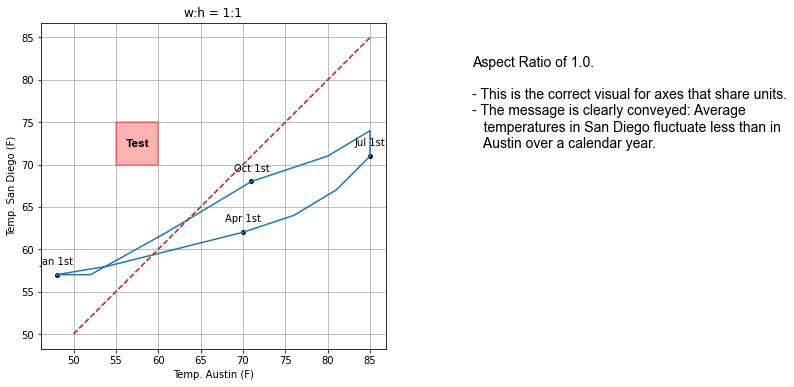

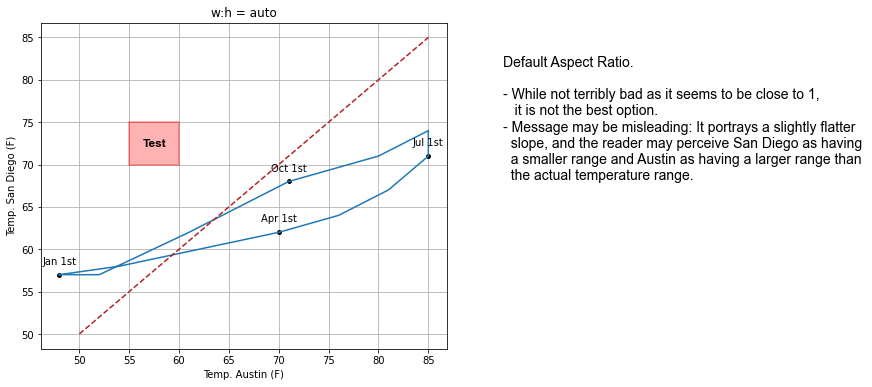

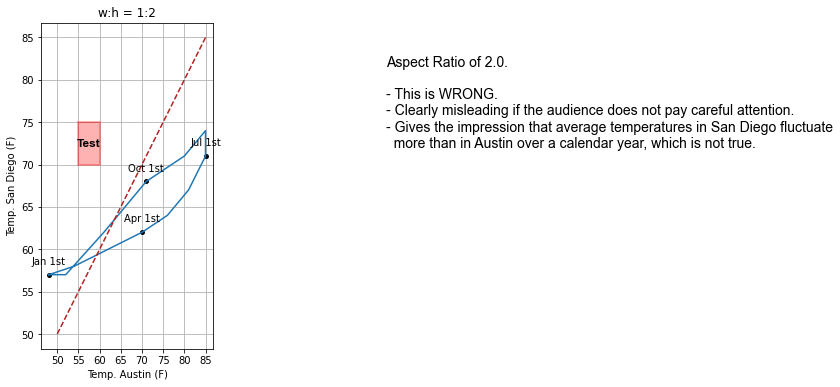

In [211]:
def dummy_axes(ax, txt = ""):
    ax.axis('off')
    ax.set_xlim(0,100)
    ax.set_ylim(0,100)
    font_props_fig = dict(fontname="Arial", fontsize='14',
                        fontweight = 'normal', color = 'black')
    ax.text( x = 5, y = 90, s = txt, verticalalignment='top', horizontalalignment='left', **font_props_fig)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,6), gridspec_kw = dict(width_ratios = [0.8, 0.2]))
plot_temps(ax[0], temp_aus, temp_sd, 'equal', 'Temp. Austin (F)', 'Temp. San Diego (F)', "w:h = 1:1")
dummy_axes(ax[1], """Aspect Ratio of 1.0.\n\n- This is the correct visual for axes that share units.
- The message is clearly conveyed: Average
   temperatures in San Diego fluctuate less than in
   Austin over a calendar year.
""")
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,6), gridspec_kw = dict(width_ratios = [0.8, 0.2]))
plot_temps(ax[0], temp_aus, temp_sd, 'auto', 'Temp. Austin (F)', 'Temp. San Diego (F)', "w:h = auto",)
dummy_axes(ax[1], """Default Aspect Ratio.\n\n- While not terribly bad as it seems to be close to 1,
   it is not the best option.
- Message may be misleading: It portrays a slightly flatter \n  slope, and the reader may perceive San Diego as having
  a smaller range and Austin as having a larger range than \n  the actual temperature range. """)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,6), gridspec_kw = dict(width_ratios = [0.8, 0.2]))
plot_temps(ax[0], temp_aus, temp_sd, 2, 'Temp. Austin (F)', 'Temp. San Diego (F)', "w:h = 1:2")
dummy_axes(ax[1],  """Aspect Ratio of 2.0.\n\n- This is WRONG.
- Clearly misleading if the audience does not pay careful attention.
- Gives the impression that average temperatures in San Diego fluctuate
  more than in Austin over a calendar year, which is not true.
""")
plt.show()

## Aspect Ratio in Time Series

# Banking to 45$^\circ$

In [13]:
## 